This file is for demo only.

We can read the `progress.csv` and plot the learning curve:

Keys in the data: Index(['index', 'Unnamed: 0', 'log_dir', 'frame_per_second', 'policy_loss',
       'entropy', 'value_loss', 'total_loss', 'grad_norm', 'adv_mean', 'ratio',
       'total_steps', 'total_episodes', 'iteration', 'total_time',
       'crash_sidewalk_rate', 'crash_vehicle_rate', 'idle_rate', 'speed_km_h',
       'max_step_rate', 'success_rate', 'episode_reward', 'label'],
      dtype='object')


(10.0, 100.0)

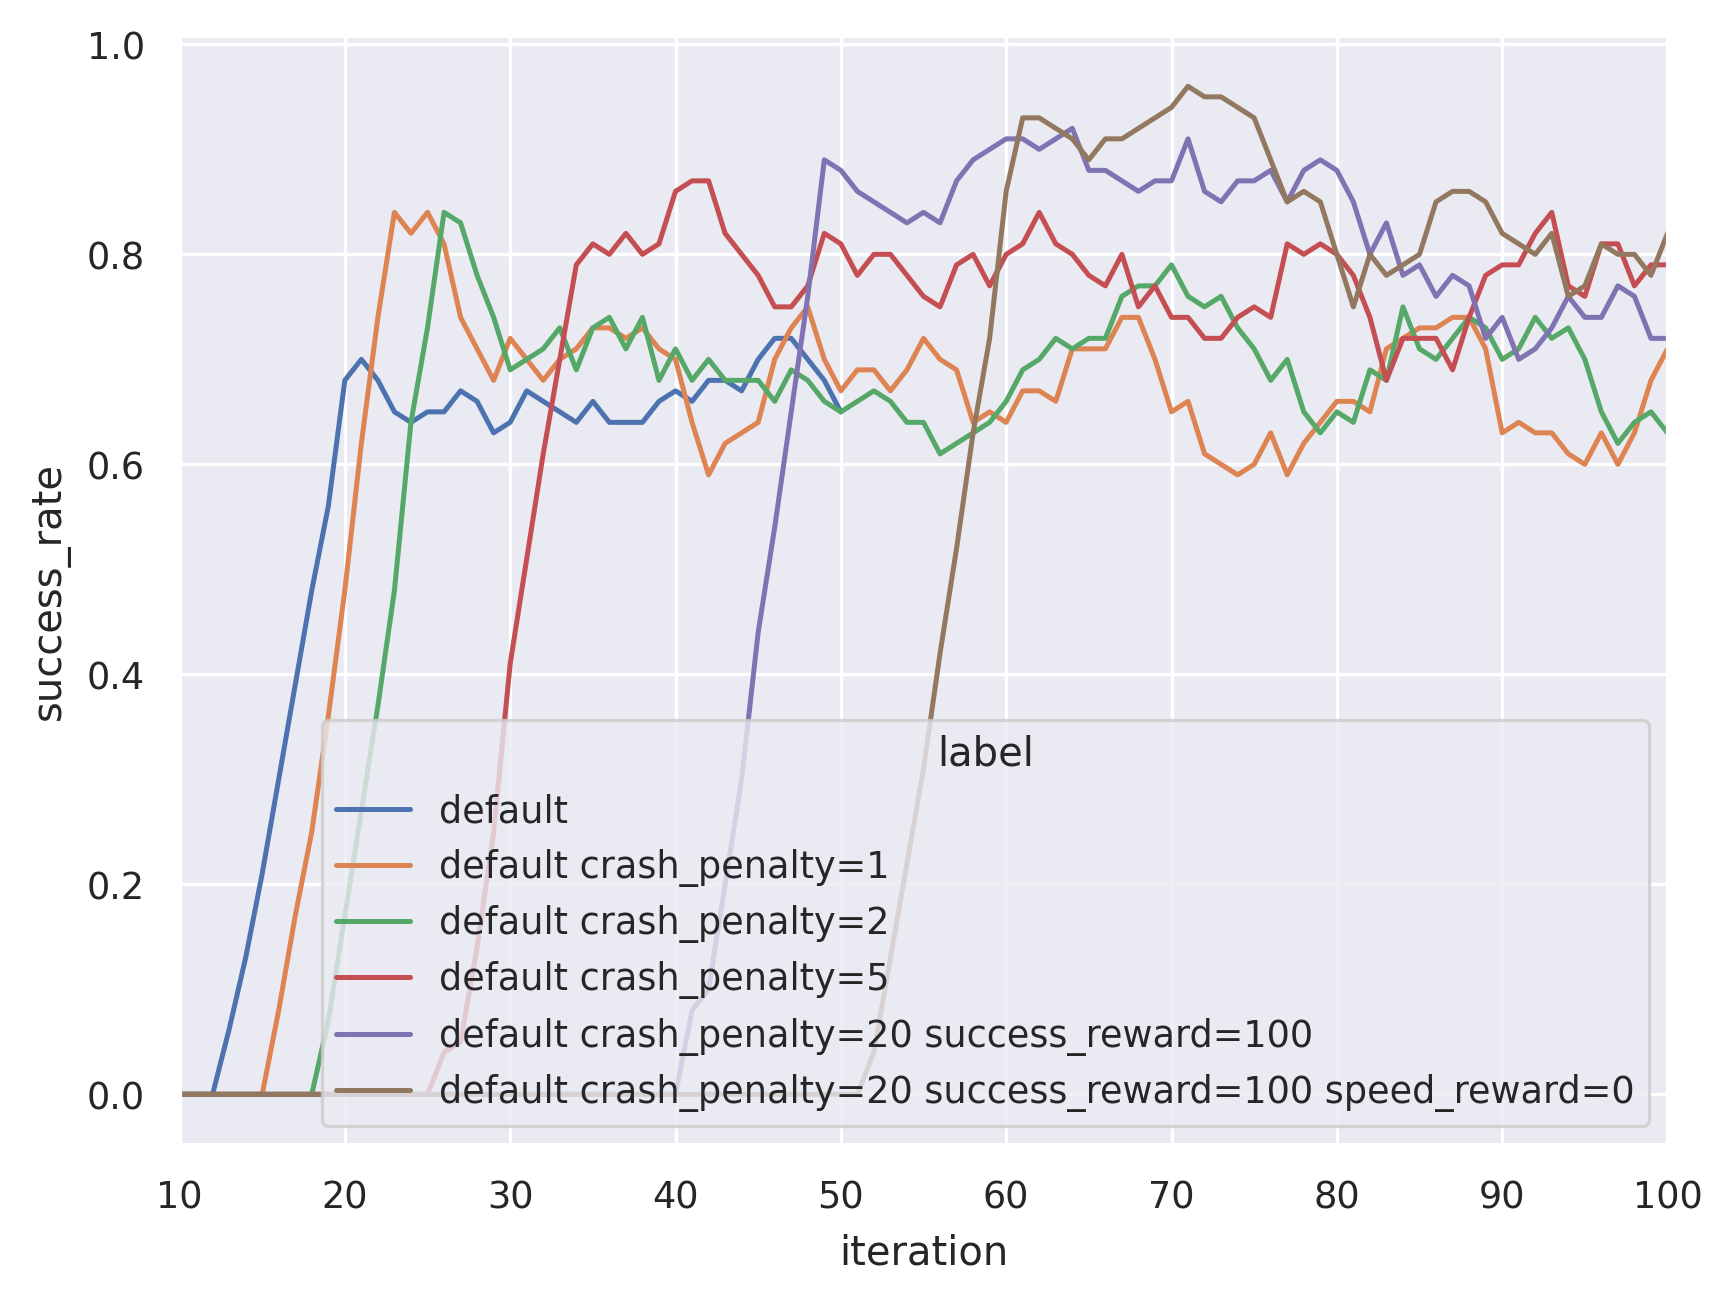

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dfs = []

progress = pd.read_csv("train_ppo_in_single_agent_env/ppo/progress.csv")
progress["label"] = "default"
dfs.append(progress)

progress = pd.read_csv("train_ppo_in_single_agent_env_crashpen1_bugfixed/ppo/progress.csv")
progress["label"] = "default crash_penalty=1"
dfs.append(progress)

progress = pd.read_csv("train_ppo_in_single_agent_env_crashpen2_bugfixed/ppo/progress.csv")
progress["label"] = "default crash_penalty=2"
dfs.append(progress)

progress = pd.read_csv("train_ppo_in_single_agent_env_crashpen5_bugfixed/ppo/progress.csv")
progress["label"] = "default crash_penalty=5"
dfs.append(progress)

progress = pd.read_csv("train_ppo_in_single_agent_env_crashpen20_sucrew100/ppo/progress.csv")
progress["label"] = "default crash_penalty=20 success_reward=100"
dfs.append(progress)

progress = pd.read_csv("train_ppo_in_single_agent_env_crashpen20_sucrew100_speedrew0/ppo/progress.csv")
progress["label"] = "default crash_penalty=20 success_reward=100 speed_reward=0"
dfs.append(progress)

dataframe = pd.concat(dfs).reset_index()

print("Keys in the data:", dataframe.keys())

plt.figure(dpi=300)
sns.set("paper", "darkgrid")
ax = sns.lineplot(
    data=dataframe,
    x="iteration",
    y="success_rate",  # <<< Change this to arbitrary key in the data
    hue="label"
)

plt.xlim(10, 100)
